Mean Absolute Error: 5.33
Mean Squared Error: 42.43
                Feature  Importance
1         avg_pollution    0.885902
4  existing_green_space    0.069687
2              avg_temp    0.020309
3              humidity    0.012246
0    population_density    0.011857


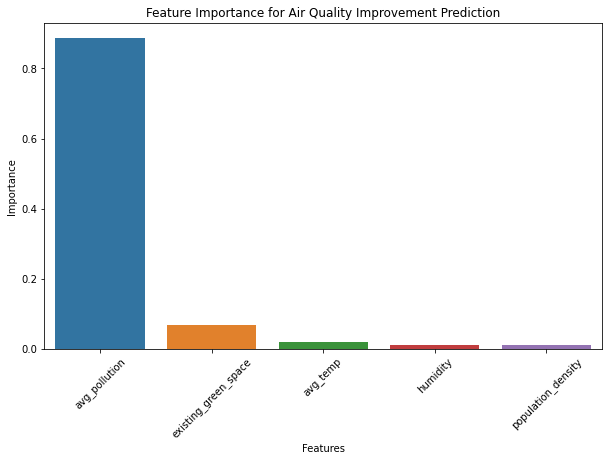

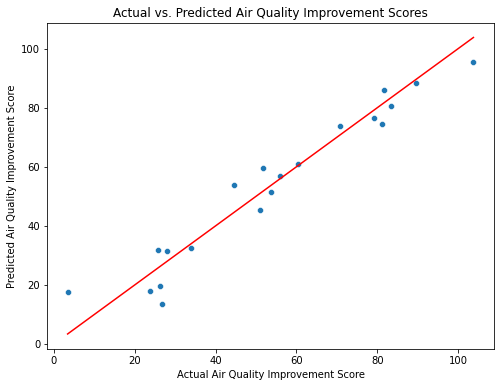

IntSlider(value=50, description='Pollution Level:')

Dropdown(description='Climate Type:', options=('Tropical', 'Temperate', 'Other'), value='Tropical')

Output()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Load the data
data = pd.read_csv('urban_green_space_data.csv')
features = ['population_density', 'avg_pollution', 'avg_temp', 'humidity', 'existing_green_space']
target = 'air_quality_improvement_score'

# Select relevant columns
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Extract feature importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Feature Importance Bar Chart (Vertical)
def plot_feature_importance(model, features):
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
    plt.title('Feature Importance for Air Quality Improvement Prediction')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)  # Rotate x labels for readability
    plt.show()

# Call the function to plot feature importance
plot_feature_importance(model, features)

# Predicted vs. Actual Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Air Quality Improvement Score')
plt.ylabel('Predicted Air Quality Improvement Score')
plt.title('Actual vs. Predicted Air Quality Improvement Scores')
plt.show()

# Define the function to recommend vegetation based on pollution level and climate
def recommend_vegetation(pollution_level, climate):
    if climate == 'Tropical':
        if pollution_level > 50:
            recommendations = [
                {"plant_name": "Bamboo", "water_needs": "High"},
                {"plant_name": "Neem", "water_needs": "Moderate"},
            ]
        else:
            recommendations = [
                {"plant_name": "Aloe Vera", "water_needs": "Low"},
                {"plant_name": "Snake Plant", "water_needs": "Low"},
            ]
    elif climate == 'Temperate':
        if pollution_level > 50:
            recommendations = [
                {"plant_name": "Oak", "water_needs": "High"},
                {"plant_name": "Pine", "water_needs": "Moderate"},
            ]
        else:
            recommendations = [
                {"plant_name": "Lavender", "water_needs": "Low"},
                {"plant_name": "Sage", "water_needs": "Low"},
            ]
    else:
        recommendations = [
            {"plant_name": "Aloe Vera", "water_needs": "Low"},
            {"plant_name": "Bamboo", "water_needs": "High"},
        ]

    return pd.DataFrame(recommendations)

# Create interactive widgets for input
pollution_slider = widgets.IntSlider(value=50, min=0, max=100, step=1, description='Pollution Level:')
climate_dropdown = widgets.Dropdown(options=['Tropical', 'Temperate', 'Other'], description='Climate Type:')

# Create an output area to display recommendations
output = widgets.Output()

# Function to update the recommendations based on user input
def update_recommendations(change):
    with output:
        output.clear_output()
        pollution_level = pollution_slider.value
        climate = climate_dropdown.value
        recommendations = recommend_vegetation(pollution_level, climate)
        print("Recommended Vegetation:")
        print(recommendations)

# Observe changes in the widgets to update recommendations
pollution_slider.observe(update_recommendations, names='value')
climate_dropdown.observe(update_recommendations, names='value')

# Display the widgets and the output
display(pollution_slider, climate_dropdown, output)

